# FT NER Eval and Plot

In [1]:
!pip install nervaluate

In [2]:
import pickle
def reload_vars(filename):
    this_var = None
    with open(filename, 'rb') as file:
        this_var = pickle.load(file)
        
    return this_var


def pkl_vars(varname, filename):
    with open(filename, 'wb') as file:
        pickle.dump(varname, file)

from ast import literal_eval

import pandas as pd
import numpy as np
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

# Plot Seqeval Losses

## Read all results

In [14]:
import glob

In [17]:
# Get list of filenames
all_files = glob.glob("finetuning_results/test_*5e-05_8_15.csv")

In [21]:
all_files.sort()
all_files

['finetuning_results/test_GottBERT_base_last_set-1_5e-05_8_15.csv',
 'finetuning_results/test_GottBERT_base_last_set-2_5e-05_8_15.csv',
 'finetuning_results/test_GottBERT_base_last_set-3_5e-05_8_15.csv',
 'finetuning_results/test_GottBERT_base_last_set-4_5e-05_8_15.csv',
 'finetuning_results/test_GottBERT_base_last_set-5_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased-oldvocab_set-1_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased-oldvocab_set-2_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased-oldvocab_set-3_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased-oldvocab_set-4_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased-oldvocab_set-5_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased_set-1_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased_set-2_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-german-cased_set-3_5e-05_8_15.csv',
 'finetuning_results/test_bert-base-ger

In [26]:
df_list = []
for f in all_files:
    # Read each CSV (even if columns are missing)
    temp_df = pd.read_csv(f)
    df_list.append(temp_df)

# Concatenate all DataFrames, filling missing columns with NaN
df_all_results = pd.concat(df_list, ignore_index=True)

In [29]:
#del df_list
df_all_results

,DATE-CREATION_precision,DATE-CREATION_recall,DATE-CREATION_f1-score,DATE-CREATION_support,DATE-PUB_precision,DATE-PUB_recall,DATE-PUB_f1-score,DATE-PUB_support,DATE-SUBJ_precision,DATE-SUBJ_recall,...,ORG_f1-score,ORG_support,I-GPE-DES_precision,I-GPE-DES_recall,I-GPE-DES_f1-score,I-GPE-DES_support,GPE-AUT_precision,GPE-AUT_recall,GPE-AUT_f1-score,GPE-AUT_support
0,0.794872,0.563636,0.659574,55,0.304348,0.233333,0.264151,30,0.468085,0.468085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.239437,0.309091,0.269841,55,1.000000,0.000000,0.000000,30,0.382022,0.542553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.759259,0.745455,0.752294,55,0.411765,0.233333,0.297872,30,0.674877,0.728723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.631579,0.580645,0.605042,62,0.000000,0.000000,0.000000,58,0.473684,0.717391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.560000,0.677419,0.613139,62,0.185185,0.086207,0.117647,58,0.511494,0.644928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.222222,0.160000,0.186047,50,1.000000,0.000000,0.000000,23,0.409938,0.767442,...,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
86,0.597222,0.860000,0.704918,50,0.000000,0.000000,0.000000,23,0.586207,0.593023,...,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
87,0.772727,0.918919,0.839506,37,0.193548,0.315789,0.240000,19,0.681034,0.675214,...,0.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,5.0
88,0.621622,0.621622,0.621622,37,1.000000,0.000000,0.000000,19,0.482993,0.606838,...,0.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,5.0


In [33]:
df_all_results.to_csv("finetuning_results/all_results_04052025.csv", index=False)

## Plot!

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df_all_results = pd.read_csv("finetuning_results/all_results_04052025.csv")
df_all_results

,DATE-CREATION_precision,DATE-CREATION_recall,DATE-CREATION_f1-score,DATE-CREATION_support,DATE-PUB_precision,DATE-PUB_recall,DATE-PUB_f1-score,DATE-PUB_support,DATE-SUBJ_precision,DATE-SUBJ_recall,...,ORG_f1-score,ORG_support,I-GPE-DES_precision,I-GPE-DES_recall,I-GPE-DES_f1-score,I-GPE-DES_support,GPE-AUT_precision,GPE-AUT_recall,GPE-AUT_f1-score,GPE-AUT_support
0,0.794872,0.563636,0.659574,55,0.304348,0.233333,0.264151,30,0.468085,0.468085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.239437,0.309091,0.269841,55,1.000000,0.000000,0.000000,30,0.382022,0.542553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.759259,0.745455,0.752294,55,0.411765,0.233333,0.297872,30,0.674877,0.728723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.631579,0.580645,0.605042,62,0.000000,0.000000,0.000000,58,0.473684,0.717391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.560000,0.677419,0.613139,62,0.185185,0.086207,0.117647,58,0.511494,0.644928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.222222,0.160000,0.186047,50,1.000000,0.000000,0.000000,23,0.409938,0.767442,...,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
86,0.597222,0.860000,0.704918,50,0.000000,0.000000,0.000000,23,0.586207,0.593023,...,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
87,0.772727,0.918919,0.839506,37,0.193548,0.315789,0.240000,19,0.681034,0.675214,...,0.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,5.0
88,0.621622,0.621622,0.621622,37,1.000000,0.000000,0.000000,19,0.482993,0.606838,...,0.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,5.0


In [63]:
df_all_results["model_name"] = df_all_results.apply(lambda x: x.model.split('/')[1], axis=1)
df_all_results["model_name"] 

0     GottBERT_base_last
1     GottBERT_base_last
2     GottBERT_base_last
3     GottBERT_base_last
4     GottBERT_base_last
             ...        
85      xlm-roberta-base
86      xlm-roberta-base
87      xlm-roberta-base
88      xlm-roberta-base
89      xlm-roberta-base
Name: model_name, Length: 90, dtype: object

In [35]:
df_all_results.columns.to_list()

['DATE-CREATION_precision',
 'DATE-CREATION_recall',
 'DATE-CREATION_f1-score',
 'DATE-CREATION_support',
 'DATE-PUB_precision',
 'DATE-PUB_recall',
 'DATE-PUB_f1-score',
 'DATE-PUB_support',
 'DATE-SUBJ_precision',
 'DATE-SUBJ_recall',
 'DATE-SUBJ_f1-score',
 'DATE-SUBJ_support',
 'GPE_precision',
 'GPE_recall',
 'GPE_f1-score',
 'GPE_support',
 'GPE-CREATION_precision',
 'GPE-CREATION_recall',
 'GPE-CREATION_f1-score',
 'GPE-CREATION_support',
 'GPE-DES_precision',
 'GPE-DES_recall',
 'GPE-DES_f1-score',
 'GPE-DES_support',
 'GPE-PUB_precision',
 'GPE-PUB_recall',
 'GPE-PUB_f1-score',
 'GPE-PUB_support',
 'GPE-SUBJ_precision',
 'GPE-SUBJ_recall',
 'GPE-SUBJ_f1-score',
 'GPE-SUBJ_support',
 'LITWORK_precision',
 'LITWORK_recall',
 'LITWORK_f1-score',
 'LITWORK_support',
 'ORG-DES_precision',
 'ORG-DES_recall',
 'ORG-DES_f1-score',
 'ORG-DES_support',
 'ORG-PUB_precision',
 'ORG-PUB_recall',
 'ORG-PUB_f1-score',
 'ORG-PUB_support',
 'ORG-SUBJ_precision',
 'ORG-SUBJ_recall',
 'ORG-SUBJ_

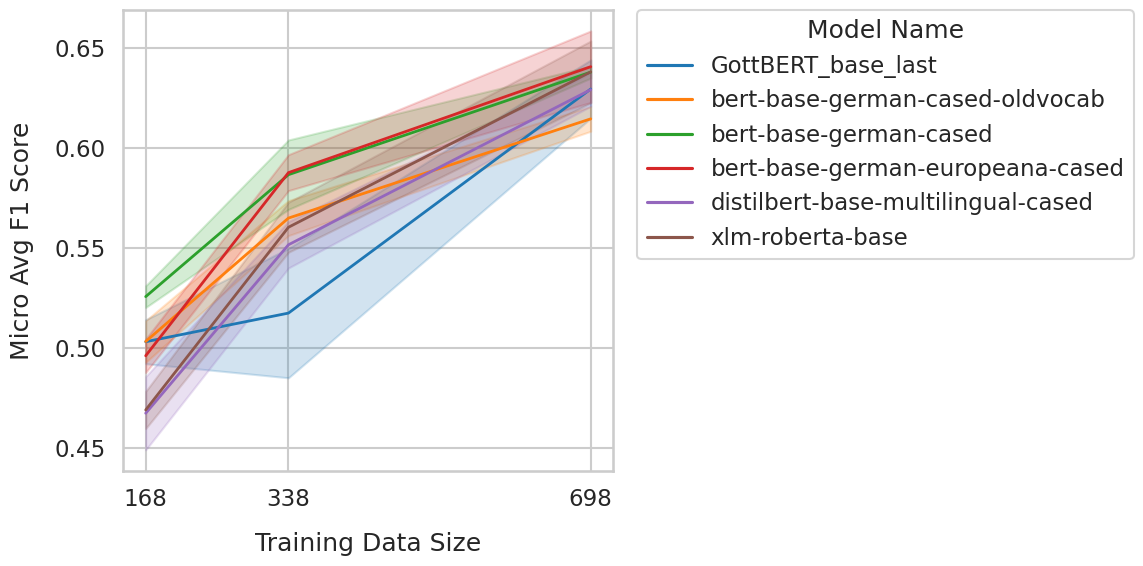

In [196]:

# Set plot style
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))

# Create line plot with error bands
lineplot = sns.lineplot(
    data=df_all_results,
    x="trainset_size",
    y="micro avg_f1-score",
    hue="model_name",
#    style="model_name",
    estimator="mean",  # Show mean across folds
    errorbar="se",     # Show standard error bands
    markers=True,      # Show markers for data points
    dashes=False,      # Use solid lines
    palette="tab10",   # Color palette for 6 models
    linewidth=2,
    zorder=100         # Ensure lines are drawn on top
)

# Customize plot
#plt.title("Micro Average F1 Score by Model and Training Data Size", pad=20)
plt.xlabel("Training Data Size", labelpad=15)
plt.ylabel("Micro Avg F1 Score", labelpad=15)
plt.xticks([168, 338, 698])  # Force specific x-ticks

# Move legend outside
plt.legend(
    title="Model Name",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.savefig("model_comparison_overall.pdf")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


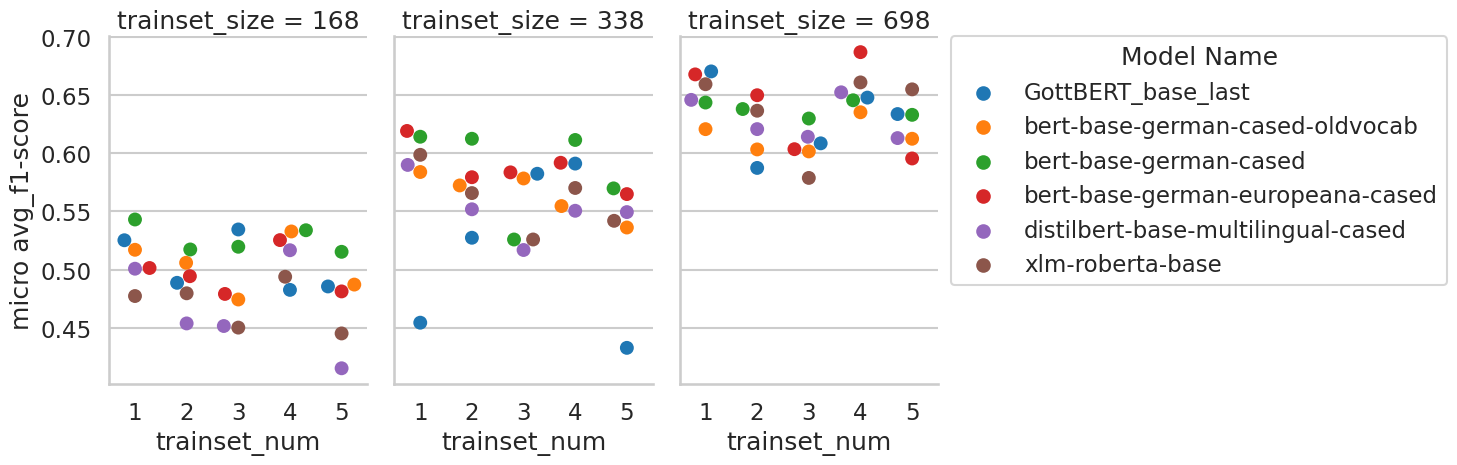

In [207]:
g = sns.FacetGrid(df_all_results, col="trainset_size", col_wrap=3, height=5)


g.map(sns.swarmplot,"trainset_num","micro avg_f1-score","model_name",palette="tab10",size=10)
# Move legend outside
plt.legend(
    title="Model Name",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)
plt.tight_layout()
#plt.xticks([1, 2, 3, 4, 5])
g.savefig("model_comparison_different_train_sizes.pdf")

# Use Nervaluate

## Check FT models

In [12]:
ft_model_path = "ft_models/bert-base-german-cased-oldvocab_ft_15ep_train_size_168_trainset_5/"


model = AutoModelForTokenClassification.from_pretrained(ft_model_path)
tokenizer = AutoTokenizer.from_pretrained(ft_model_path)
pipe = pipeline(task="token-classification", model=model, tokenizer=tokenizer, aggregation_strategy="first", device=device)

sentence = 'Nachdem nunmehr Gott der allmächtige/ nach ohnlängst zugeschicktem trawrigen fall und zustand/ uns wiederumb in gnaden erfrewet/ und dem ... Ertzstifft Maintz/ sampt hiesiger gemeiner Stadt einen newen Ober: und Erbherrn ... zu einem Ertzbischoffen zu Maintz/ auch ... Churfürsten ... Herrn Anshelm Casimir ... erkohren und erhoben ...'

raw_results = pipe(sentence)

In [208]:
raw_results

[{'entity_group': 'GPE-SUBJ',
  'score': 0.95264417,
  'word': 'Maintz',
  'start': 152,
  'end': 158},
 {'entity_group': 'GPE-SUBJ',
  'score': 0.9243728,
  'word': 'Maintz',
  'start': 252,
  'end': 258},
 {'entity_group': 'PERSON-SUBJ',
  'score': 0.9889653,
  'word': 'Anshelm Casimir',
  'start': 291,
  'end': 306}]

In [294]:
gott_ft_model_path = "ft_models/GottBERT_base_last_ft_15ep_train_size_698_trainset_1/"


gott_model = AutoModelForTokenClassification.from_pretrained(gott_ft_model_path)
gott_tokenizer = AutoTokenizer.from_pretrained(gott_ft_model_path)
gott_pipe = pipeline(task="token-classification", model=gott_model, tokenizer=gott_tokenizer, aggregation_strategy="max", device=device)

sentence = 'Nachdem nunmehr Gott der allmächtige/ nach ohnlängst zugeschicktem trawrigen fall und zustand/ uns wiederumb in gnaden erfrewet/ und dem ... Ertzstifft Maintz/ sampt hiesiger gemeiner Stadt einen newen Ober: und Erbherrn ... zu einem Ertzbischoffen zu Maintz/ auch ... Churfürsten ... Herrn Anshelm Casimir ... erkohren und erhoben ...'

gott_max_res = gott_pipe(sentence)

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/token_classification.py:398: UserWarning: Tokenizer does not support real words, using fallback heuristic
  warnings.warn(


In [234]:
ft_model_path = "ft_models/bert-base-german-europeana-cased_ft_15ep_train_size_698_trainset_4/"


model = AutoModelForTokenClassification.from_pretrained(ft_model_path)
tokenizer = AutoTokenizer.from_pretrained(ft_model_path)
pipe = pipeline(task="token-classification", model=model, tokenizer=tokenizer, aggregation_strategy="none", device=device)

sentence = 'Nachdem nunmehr Gott der allmächtige/ nach ohnlängst zugeschicktem trawrigen fall und zustand/ uns wiederumb in gnaden erfrewet/ und dem ... Ertzstifft Maintz/ sampt hiesiger gemeiner Stadt einen newen Ober: und Erbherrn ... zu einem Ertzbischoffen zu Maintz/ auch ... Churfürsten ... Herrn Anshelm Casimir ... erkohren und erhoben ...'

europeana_non_agg_results = pipe([sentence])

In [236]:
europeana_non_agg_results

[[{'entity': 'B-GPE-SUBJ',
   'score': 0.9985733,
   'index': 42,
   'word': 'Main',
   'start': 152,
   'end': 156},
  {'entity': 'B-GPE-SUBJ',
   'score': 0.9986547,
   'index': 43,
   'word': '##tz',
   'start': 156,
   'end': 158},
  {'entity': 'B-GPE-SUBJ',
   'score': 0.9985423,
   'index': 69,
   'word': 'Main',
   'start': 252,
   'end': 256},
  {'entity': 'B-GPE-SUBJ',
   'score': 0.99856454,
   'index': 70,
   'word': '##tz',
   'start': 256,
   'end': 258},
  {'entity': 'B-PERSON-SUBJ',
   'score': 0.9988104,
   'index': 84,
   'word': 'Ans',
   'start': 291,
   'end': 294},
  {'entity': 'B-PERSON-SUBJ',
   'score': 0.9988938,
   'index': 85,
   'word': '##helm',
   'start': 294,
   'end': 298},
  {'entity': 'I-PERSON-SUBJ',
   'score': 0.9987544,
   'index': 86,
   'word': 'Cas',
   'start': 299,
   'end': 302},
  {'entity': 'I-PERSON-SUBJ',
   'score': 0.9991455,
   'index': 87,
   'word': '##imir',
   'start': 302,
   'end': 306}]]

## Convert IOB tags to offsets

In [243]:
label_list = reload_vars('data/vars/labels')


# Only for non-aggreagted results
def get_pred_labels(raw_results):
    pred = []

    idx = 0
    
    for result in raw_results:
        pred.append([])
        nonbio_label = 'O'
        for elem in result:
            label = elem['entity']        

            if label == 'O':
                continue
            elif label.startswith('I'):
                if len(pred[idx]) > 0 and nonbio_label == label[2:]:
                    pred[idx][-1]['end'] = elem["end"]
                else:
                    pred[idx].append({"label":label[2:], "start": elem["start"], "end": elem["end"]})
            elif label.startswith('B'):
                pred[idx].append({"label":label[2:], "start": elem["start"], "end": elem["end"]})

            nonbio_label = "-".join(label.split('-')[1:])
        idx += 1

    return pred

get_pred_labels(europeana_non_agg_results)

[[{'label': 'GPE-SUBJ', 'start': 152, 'end': 156},
  {'label': 'GPE-SUBJ', 'start': 156, 'end': 158},
  {'label': 'GPE-SUBJ', 'start': 252, 'end': 256},
  {'label': 'GPE-SUBJ', 'start': 256, 'end': 258},
  {'label': 'PERSON-SUBJ', 'start': 291, 'end': 294},
  {'label': 'PERSON-SUBJ', 'start': 294, 'end': 306}]]

In [358]:
# covert grouped results
def convert_grouped_pred_labels(raw_result_list):
    # change 'entity_group' to 'label'
    return [[{'label':li['entity_group'], 'start': li['start'], 'end':li['end']} for li in res] for res in raw_result_list  ]

#convert GT data
def iob_to_entities(tags):
    entities = []
    start = None
    label = None

    for i, tag in enumerate(tags):
        if tag == 'O':
            if label is not None:
                entities.append({'label': label, 'start': start, 'end': i})
                label = None
                start = None
        elif tag.startswith('B-'):
            if label is not None:
                entities.append({'label': label, 'start': start, 'end': i})
            label = tag[2:]
            start = i
        elif tag.startswith('I-'):
            if label is None or tag[2:] != label:
                # Handle incorrect IOB format: treat as B-
                label = tag[2:]
                start = i
        else:
            raise ValueError(f"Invalid tag: {tag}")

    if label is not None:
        entities.append({'label': label, 'start': start, 'end': len(tags)})

    return entities


def iob_to_entities_with_offsets(tags, sentence, tokens):
    gt_labels = []
    
    nonbio_label = 'O'
    min_start = 0
    for idx, token in enumerate(tokens):
        #print(f'{idx}: {token}')
        start_pos = sentence.find(token, min_start)
        min_start =  start_pos # go ahead
        end_pos = start_pos + len(token)
        #print(start_pos, end_pos)
        label = tags[idx]
        #print(label_str)

        if label == 'O':
            nonbio_label = 'O'
            continue
        elif label.startswith('I'):
            if nonbio_label == label[2:]:
                gt_labels[-1]['end'] = end_pos
                
        elif label.startswith('B'):
            gt_labels.append({"label":label[2:], "start": start_pos, "end": end_pos})
            nonbio_label = "-".join(label.split('-')[1:])
    return gt_labels

def gt_2sent_labels(row):
    return iob_to_entities_with_offsets(row['ner_tags'],row['sentence'], row['tokens'])

### tests

In [250]:
df_test = pd.read_csv('data/5-fold/test_1.csv',converters={"tokens":literal_eval, "ner_tags":literal_eval})
df_test['ner_tags'][0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GPE-SUBJ',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GPE-SUBJ',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-PERSON-SUBJ',
 'I-PERSON-SUBJ',
 'O',
 'O',
 'O',
 'O',
 'O']

In [256]:
sample_tags = df_test['ner_tags'][0] 
iob_to_entities(sample_tags)

[{'label': 'GPE-SUBJ', 'start': 24, 'end': 25},
 {'label': 'GPE-SUBJ', 'start': 41, 'end': 42},
 {'label': 'PERSON-SUBJ', 'start': 48, 'end': 50}]

In [277]:
df_test['tokens'][0][24:25], df_test['tokens'][0][41:42], df_test['tokens'][0][48:50]

(['Maintz'], ['Maintz'], ['Anshelm', 'Casimir'])

In [313]:
sample_sentence = df_test['sentence'][0]

In [314]:
len(sample_sentence)

335

In [262]:
sample_tokens = df_test['tokens'][0]
len(sample_tokens), len(' '.join(sample_tokens))

(55, 341)

In [359]:
sample_entities = iob_to_entities_with_offsets(sample_tags,sample_sentence,sample_tokens)
sample_entities

[{'label': 'GPE-SUBJ', 'start': 152, 'end': 158},
 {'label': 'GPE-SUBJ', 'start': 252, 'end': 258},
 {'label': 'PERSON-SUBJ', 'start': 291, 'end': 306}]

In [279]:
sample_sentence[152:158], sample_sentence[152:158], sample_sentence[291:306]

('Maintz', 'Maintz', 'Anshelm Casimir')

In [284]:
europeana_non_agg_results = pipe([sample_sentence])

In [285]:
europeana_non_agg_results

[[{'entity': 'B-GPE-SUBJ',
   'score': 0.9985733,
   'index': 42,
   'word': 'Main',
   'start': 152,
   'end': 156},
  {'entity': 'B-GPE-SUBJ',
   'score': 0.9986547,
   'index': 43,
   'word': '##tz',
   'start': 156,
   'end': 158},
  {'entity': 'B-GPE-SUBJ',
   'score': 0.9985423,
   'index': 69,
   'word': 'Main',
   'start': 252,
   'end': 256},
  {'entity': 'B-GPE-SUBJ',
   'score': 0.99856454,
   'index': 70,
   'word': '##tz',
   'start': 256,
   'end': 258},
  {'entity': 'B-PERSON-SUBJ',
   'score': 0.9988104,
   'index': 84,
   'word': 'Ans',
   'start': 291,
   'end': 294},
  {'entity': 'B-PERSON-SUBJ',
   'score': 0.9988938,
   'index': 85,
   'word': '##helm',
   'start': 294,
   'end': 298},
  {'entity': 'I-PERSON-SUBJ',
   'score': 0.9987544,
   'index': 86,
   'word': 'Cas',
   'start': 299,
   'end': 302},
  {'entity': 'I-PERSON-SUBJ',
   'score': 0.9991455,
   'index': 87,
   'word': '##imir',
   'start': 302,
   'end': 306}]]

In [291]:
europeana_non_agg_results_pred_label = [[{'label':li['entity'], 'start': li['start'], 'end':li['end']} for li in res  ]for res in europeana_non_agg_results]

In [292]:
europeana_non_agg_results_pred_label

[[{'label': 'B-GPE-SUBJ', 'start': 152, 'end': 156},
  {'label': 'B-GPE-SUBJ', 'start': 156, 'end': 158},
  {'label': 'B-GPE-SUBJ', 'start': 252, 'end': 256},
  {'label': 'B-GPE-SUBJ', 'start': 256, 'end': 258},
  {'label': 'B-PERSON-SUBJ', 'start': 291, 'end': 294},
  {'label': 'B-PERSON-SUBJ', 'start': 294, 'end': 298},
  {'label': 'I-PERSON-SUBJ', 'start': 299, 'end': 302},
  {'label': 'I-PERSON-SUBJ', 'start': 302, 'end': 306}]]

In [322]:
two_sample_sentences =list(df_test['sentence'][0:2])
two_sample_sentences

['Nachdem nunmehr Gott der allmächtige/ nach ohnlängst zugeschicktem trawrigen fall und zustand/ uns wiederumb in gnaden erfrewet/ und dem ... Ertzstifft Maintz/ sampt hiesiger gemeiner Stadt einen newen Ober: und Erbherrn ... zu einem Ertzbischoffen zu Maintz/ auch ... Churfürsten ... Herrn Anshelm Casimir ... erkohren und erhoben ...',
 "Samuel Thomas Soemmerring über den Saft, welcher aus den Nerven wieder eingesaugt wird, im gesunden und kranken Zustande des menschlichen Körpers : Eine Abhandlung, welche zu Amsterdam den Preis des Monnikhof'schen Legats im Jahre 1810 erhielt"]

In [340]:
pred_2_samples_labels = gott_pipe(two_sample_sentences )
pred_2_samples_labels

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/token_classification.py:398: UserWarning: Tokenizer does not support real words, using fallback heuristic
  warnings.warn(


[[{'entity_group': 'PERSON-SUBJ',
   'score': 0.99720913,
   'word': ' Anshelm Casimir',
   'start': 291,
   'end': 306}],
 [{'entity_group': 'PERSON-AUT',
   'score': 0.99447626,
   'word': 'Samuel',
   'start': 0,
   'end': 6},
  {'entity_group': 'PERSON-AUT',
   'score': 0.9830513,
   'word': ' Thomas Soemmerring',
   'start': 7,
   'end': 25},
  {'entity_group': 'GPE-SUBJ',
   'score': 0.6825773,
   'word': ' Amsterdam',
   'start': 175,
   'end': 184},
  {'entity_group': 'PERSON-SUBJ',
   'score': 0.59357315,
   'word': " Monnikhof'schen",
   'start': 199,
   'end': 214},
  {'entity_group': 'YEAR-PUB',
   'score': 0.61674017,
   'word': ' 1810',
   'start': 231,
   'end': 235}]]

In [342]:
pred_2sent_labels = convert_grouped_pred_labels(pred_2_samples_labels)
pred_2sent_labels

[[{'label': 'PERSON-SUBJ', 'start': 291, 'end': 306}],
 [{'label': 'PERSON-AUT', 'start': 0, 'end': 6},
  {'label': 'PERSON-AUT', 'start': 7, 'end': 25},
  {'label': 'GPE-SUBJ', 'start': 175, 'end': 184},
  {'label': 'PERSON-SUBJ', 'start': 199, 'end': 214},
  {'label': 'YEAR-PUB', 'start': 231, 'end': 235}]]

In [361]:
df_test['gt_lb_offset'] = df_test.apply(gt_2sent_labels, axis=1)

In [364]:
two_gt_lb = list(df_test['gt_lb_offset'][:2])
two_gt_lb

[[{'label': 'GPE-SUBJ', 'start': 152, 'end': 158},
  {'label': 'GPE-SUBJ', 'start': 252, 'end': 258},
  {'label': 'PERSON-SUBJ', 'start': 291, 'end': 306}],
 [{'label': 'PERSON-AUT', 'start': 0, 'end': 25},
  {'label': 'GPE-SUBJ', 'start': 175, 'end': 184},
  {'label': 'YEAR-CREATION', 'start': 231, 'end': 235}]]

## make tag list

In [387]:
label_list = reload_vars('data/vars/labels')
label_list

['',
 'B-DATE-CREATION',
 'B-DATE-PUB',
 'B-DATE-SUBJ',
 'B-GPE-AUT',
 'B-GPE-CREATION',
 'B-GPE-DES',
 'B-GPE-PUB',
 'B-GPE-SUBJ',
 'B-LITWORK',
 'B-ORG-CREATION',
 'B-ORG-DES',
 'B-ORG-PUB',
 'B-ORG-SUBJ',
 'B-PERSON-AUT',
 'B-PERSON-CON',
 'B-PERSON-EDT',
 'B-PERSON-PUB',
 'B-PERSON-SUBJ',
 'B-YEAR-CREATION',
 'B-YEAR-PUB',
 'B-YEAR-SUBJ',
 'I-DATE-CREATION',
 'I-DATE-PUB',
 'I-DATE-SUBJ',
 'I-GPE',
 'I-GPE-CREATION',
 'I-GPE-DES',
 'I-GPE-PUB',
 'I-GPE-SUBJ',
 'I-I-GPE-DES',
 'I-LITWORK',
 'I-ORG',
 'I-ORG-CREATION',
 'I-ORG-DES',
 'I-ORG-PUB',
 'I-ORG-SUBJ',
 'I-PERSON-AUT',
 'I-PERSON-CON',
 'I-PERSON-EDT',
 'I-PERSON-PUB',
 'I-PERSON-SUBJ',
 'I-YEAR-CREATION',
 'I_ORG-DES',
 'O']

In [389]:
'O'.split('-')[1:]

[]

In [391]:
labels = label_list[1:]
tags = ["-".join(x.split('-')[1:]) for x in labels]
tags = list(set(tags))
print(tags) # '' comes from 'O'

['', 'PERSON-SUBJ', 'GPE-DES', 'PERSON-EDT', 'DES', 'I-GPE-DES', 'GPE-AUT', 'ORG-CREATION', 'ORG-PUB', 'DATE-CREATION', 'YEAR-PUB', 'GPE-PUB', 'LITWORK', 'ORG', 'PERSON-CON', 'DATE-SUBJ', 'PERSON-AUT', 'GPE-CREATION', 'ORG-SUBJ', 'YEAR-CREATION', 'ORG-DES', 'YEAR-SUBJ', 'GPE', 'DATE-PUB', 'PERSON-PUB', 'GPE-SUBJ']


In [390]:
pkl_vars(tags, 'data/vars/tags')

## eval !

In [370]:
from nervaluate import Evaluator

In [367]:
from collections import defaultdict

def flip_nested_dict(dd):
    result = defaultdict(dict)
    for k1, d in dd.items():
        for k2, v in d.items():
            result[k2][k1] = v
    return dict(result)

In [392]:
tags = reload_vars('data/vars/tags')

### tests

In [406]:
evaluator = Evaluator(two_gt_lb, pred_2sent_labels, tags=tags)

eval_res = evaluator.evaluate()
macro_results2 = eval_res[0]
micro_results2 = eval_res[1]

pd_macro2 = pd.DataFrame(flip_nested_dict(macro_results2))
pd_macro2

,correct,incorrect,partial,missed,spurious,possible,actual,precision,recall,f1
ent_type,3,1,0,2,2,6,6,0.500000,0.500000,0.500000
partial,3,0,1,2,2,6,6,0.583333,0.583333,0.583333
strict,2,2,0,2,2,6,6,0.333333,0.333333,0.333333
exact,3,1,0,2,2,6,6,0.500000,0.500000,0.500000


In [398]:
evaluator = Evaluator(two_gt_lb, two_gt_lb, tags=tags)

eval_res = evaluator.evaluate()
macro_results2 = eval_res[0]

pd_macro2 = pd.DataFrame(flip_nested_dict(macro_results2))
pd_macro2

,correct,incorrect,partial,missed,spurious,possible,actual,precision,recall,f1
ent_type,6,0,0,0,0,6,6,1.0,1.0,1.0
partial,6,0,0,0,0,6,6,1.0,1.0,1.0
strict,6,0,0,0,0,6,6,1.0,1.0,1.0
exact,6,0,0,0,0,6,6,1.0,1.0,1.0


In [415]:
macro_results2['strict']['f1']

0.3333333333333333

In [399]:
evaluator = Evaluator(two_gt_lb, [[],[]], tags=tags)

eval_res = evaluator.evaluate()
macro_results2 = eval_res[0]

pd_macro2 = pd.DataFrame(flip_nested_dict(macro_results2))
pd_macro2

,correct,incorrect,partial,missed,spurious,possible,actual,precision,recall,f1
ent_type,0,0,0,6,0,6,0,0,0.0,0
partial,0,0,0,6,0,6,0,0,0.0,0
strict,0,0,0,6,0,6,0,0,0.0,0
exact,0,0,0,6,0,6,0,0,0.0,0


In [422]:
eval_res[0]

{'ent_type': {'correct': 655,
  'incorrect': 220,
  'partial': 0,
  'missed': 113,
  'spurious': 503,
  'possible': 988,
  'actual': 1378,
  'precision': 0.4753265602322206,
  'recall': 0.6629554655870445,
  'f1': 0.5536770921386305},
 'partial': {'correct': 549,
  'incorrect': 0,
  'partial': 326,
  'missed': 113,
  'spurious': 503,
  'possible': 988,
  'actual': 1378,
  'precision': 0.5166908563134979,
  'recall': 0.7206477732793523,
  'f1': 0.6018596787827557},
 'strict': {'correct': 434,
  'incorrect': 441,
  'partial': 0,
  'missed': 113,
  'spurious': 503,
  'possible': 988,
  'actual': 1378,
  'precision': 0.3149492017416546,
  'recall': 0.4392712550607287,
  'f1': 0.3668639053254438},
 'exact': {'correct': 549,
  'incorrect': 326,
  'partial': 0,
  'missed': 113,
  'spurious': 503,
  'possible': 988,
  'actual': 1378,
  'precision': 0.3984034833091437,
  'recall': 0.555668016194332,
  'f1': 0.4640743871513102}}

### eval all models

In [408]:
import glob

In [408]:
# Get list of filenames
all_ft_paths = glob.glob("ft_models/*_ft_15ep_train_size_698_trainset_*")

In [409]:
len(all_ft_paths)

30

In [410]:
all_ft_paths[0].split("ft_models/")[1].split("ft_15ep")[0]

'bert-base-german-cased_'

In [428]:
all_macro_f1 = []

%%time
for trainset_num in range(1,6):
    df_test = pd.read_csv(f'data/5-fold/test_{trainset_num}.csv',converters={"tokens":literal_eval, "ner_tags":literal_eval})
    df_test['gt_lb_offset'] = df_test.apply(gt_2sent_labels, axis=1)
    gt_labels = list(df_test['gt_lb_offset'])
    sentences = list(df_test['sentence'] )
    for trainset_size in [698, 338, 168]:
        all_ft_model_paths = glob.glob(f"ft_models/*_ft_15ep_train_size_{trainset_size}_trainset_{trainset_num}")
        for ft_model_path in all_ft_model_paths:
            short_model_name = ft_model_path.split("ft_models/")[1].split("ft_15ep")[0]
            model = AutoModelForTokenClassification.from_pretrained(ft_model_path)
            tokenizer = AutoTokenizer.from_pretrained(ft_model_path)
            for agg in ["max", "simple", "first", "average"]:
                pipe = pipeline(task="token-classification", model=model, tokenizer=tokenizer, aggregation_strategy=agg, device=device)
                raw_results = pipe(sentences)
                pred_labels = convert_grouped_pred_labels(raw_results)
                pkl_vars(pred_labels, f'ft_agg_pred/{short_model_name}_15ep_trainsize_{trainset_size}_trainset_{trainset_num}_agg={agg}')
                evaluator = Evaluator(gt_labels, pred_labels, tags=tags)
                eval_res = evaluator.evaluate()
                pkl_vars(eval_res, f'nervaluate_ft_results/{short_model_name}_15ep_train_size_{trainset_size}_trainset_{trainset_num}_agg={agg}')
                overall_scores = eval_res[0]
                all_macro_f1.append({'model':short_model_name,
                                    'trainset_size':trainset_size,
                                    'trainset_num':trainset_num,
                                    'agg':agg,
                                    'strict_f1':overall_scores['strict']['f1'],
                                    'ent_type_f1': overall_scores['ent_type']['f1'],
                                    'partial_f1': overall_scores['partial']['f1'],
                                    'exact_f1': overall_scores['exact']['f1']})

In [437]:
all_macro_f1_to_plot = [{'model': x['model'][:-1],
  'trainset_size': x['trainset_size'],
  'trainset_num': x['trainset_num'],
  'agg': x['agg'],
  'strict': x['strict_f1'],
  'ent_type': x['ent_type_f1'],
  'partial': x['partial_f1'],
  'exact': x['exact_f1']} for x in all_macro_f1]

In [438]:
df_all_f1 = pd.DataFrame(all_macro_f1_to_plot)
df_all_f1

,model,trainset_size,trainset_num,agg,strict,ent_type,partial,exact
0,GottBERT_base_last,698,1,max,0.343970,0.603569,0.577610,0.406706
1,GottBERT_base_last,698,1,simple,0.151545,0.506667,0.393171,0.175610
2,GottBERT_base_last,698,1,first,0.301655,0.727187,0.617021,0.355556
3,GottBERT_base_last,698,1,average,0.311802,0.701311,0.610005,0.368140
4,distilbert-base-multilingual-cased,698,1,max,0.468213,0.654639,0.675258,0.553265
...,...,...,...,...,...,...,...,...
355,GottBERT_base_last,168,5,average,0.238716,0.559679,0.565697,0.342026
356,bert-base-german-cased-oldvocab,168,5,max,0.366864,0.553677,0.601860,0.464074
357,bert-base-german-cased-oldvocab,168,5,simple,0.126892,0.425765,0.365217,0.157810
358,bert-base-german-cased-oldvocab,168,5,first,0.362495,0.550858,0.597740,0.456258


In [466]:
set(df_all_f1["model"])

{'GottBERT_base_last',
 'bert-base-german-cased',
 'bert-base-german-cased-oldvocab',
 'bert-base-german-europeana-cased',
 'distilbert-base-multilingual-cased',
 'xlm-roberta-base'}

In [436]:
df_all_f1.to_csv('finetuning_results/all_nervaluate_macro_F1.csv', index=False)


# Plot Nervaluate results!

In [442]:
# Average F1 scores over 'trainset_num'
grouped = df_all_f1.groupby(['model', 'trainset_size', 'agg']).mean().reset_index()
grouped

,model,trainset_size,agg,trainset_num,strict,ent_type,partial,exact
0,GottBERT_base_last,168,average,3.0,0.226989,0.546105,0.551573,0.323374
1,GottBERT_base_last,168,first,3.0,0.216107,0.552960,0.553585,0.307901
2,GottBERT_base_last,168,max,3.0,0.243278,0.484530,0.522094,0.346705
3,GottBERT_base_last,168,simple,3.0,0.121337,0.392276,0.363086,0.162016
4,GottBERT_base_last,338,average,3.0,0.213627,0.532334,0.530898,0.299551
...,...,...,...,...,...,...,...,...
67,xlm-roberta-base,338,simple,3.0,0.128447,0.415612,0.360725,0.162810
68,xlm-roberta-base,698,average,3.0,0.308407,0.685196,0.614882,0.373479
69,xlm-roberta-base,698,first,3.0,0.304191,0.692446,0.617032,0.366440
70,xlm-roberta-base,698,max,3.0,0.330796,0.626590,0.595513,0.399481


In [443]:
# Melt F1 columns into long format
melted = pd.melt(
    grouped,
    id_vars=['model', 'trainset_size', 'agg'],
    value_vars=['strict', 'ent_type', 'partial', 'exact'],
    var_name='metric',
    value_name='f1_score'
)
melted

,model,trainset_size,agg,metric,f1_score
0,GottBERT_base_last,168,average,strict,0.226989
1,GottBERT_base_last,168,first,strict,0.216107
2,GottBERT_base_last,168,max,strict,0.243278
3,GottBERT_base_last,168,simple,strict,0.121337
4,GottBERT_base_last,338,average,strict,0.213627
...,...,...,...,...,...
283,xlm-roberta-base,338,simple,exact,0.162810
284,xlm-roberta-base,698,average,exact,0.373479
285,xlm-roberta-base,698,first,exact,0.366440
286,xlm-roberta-base,698,max,exact,0.399481


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be plac

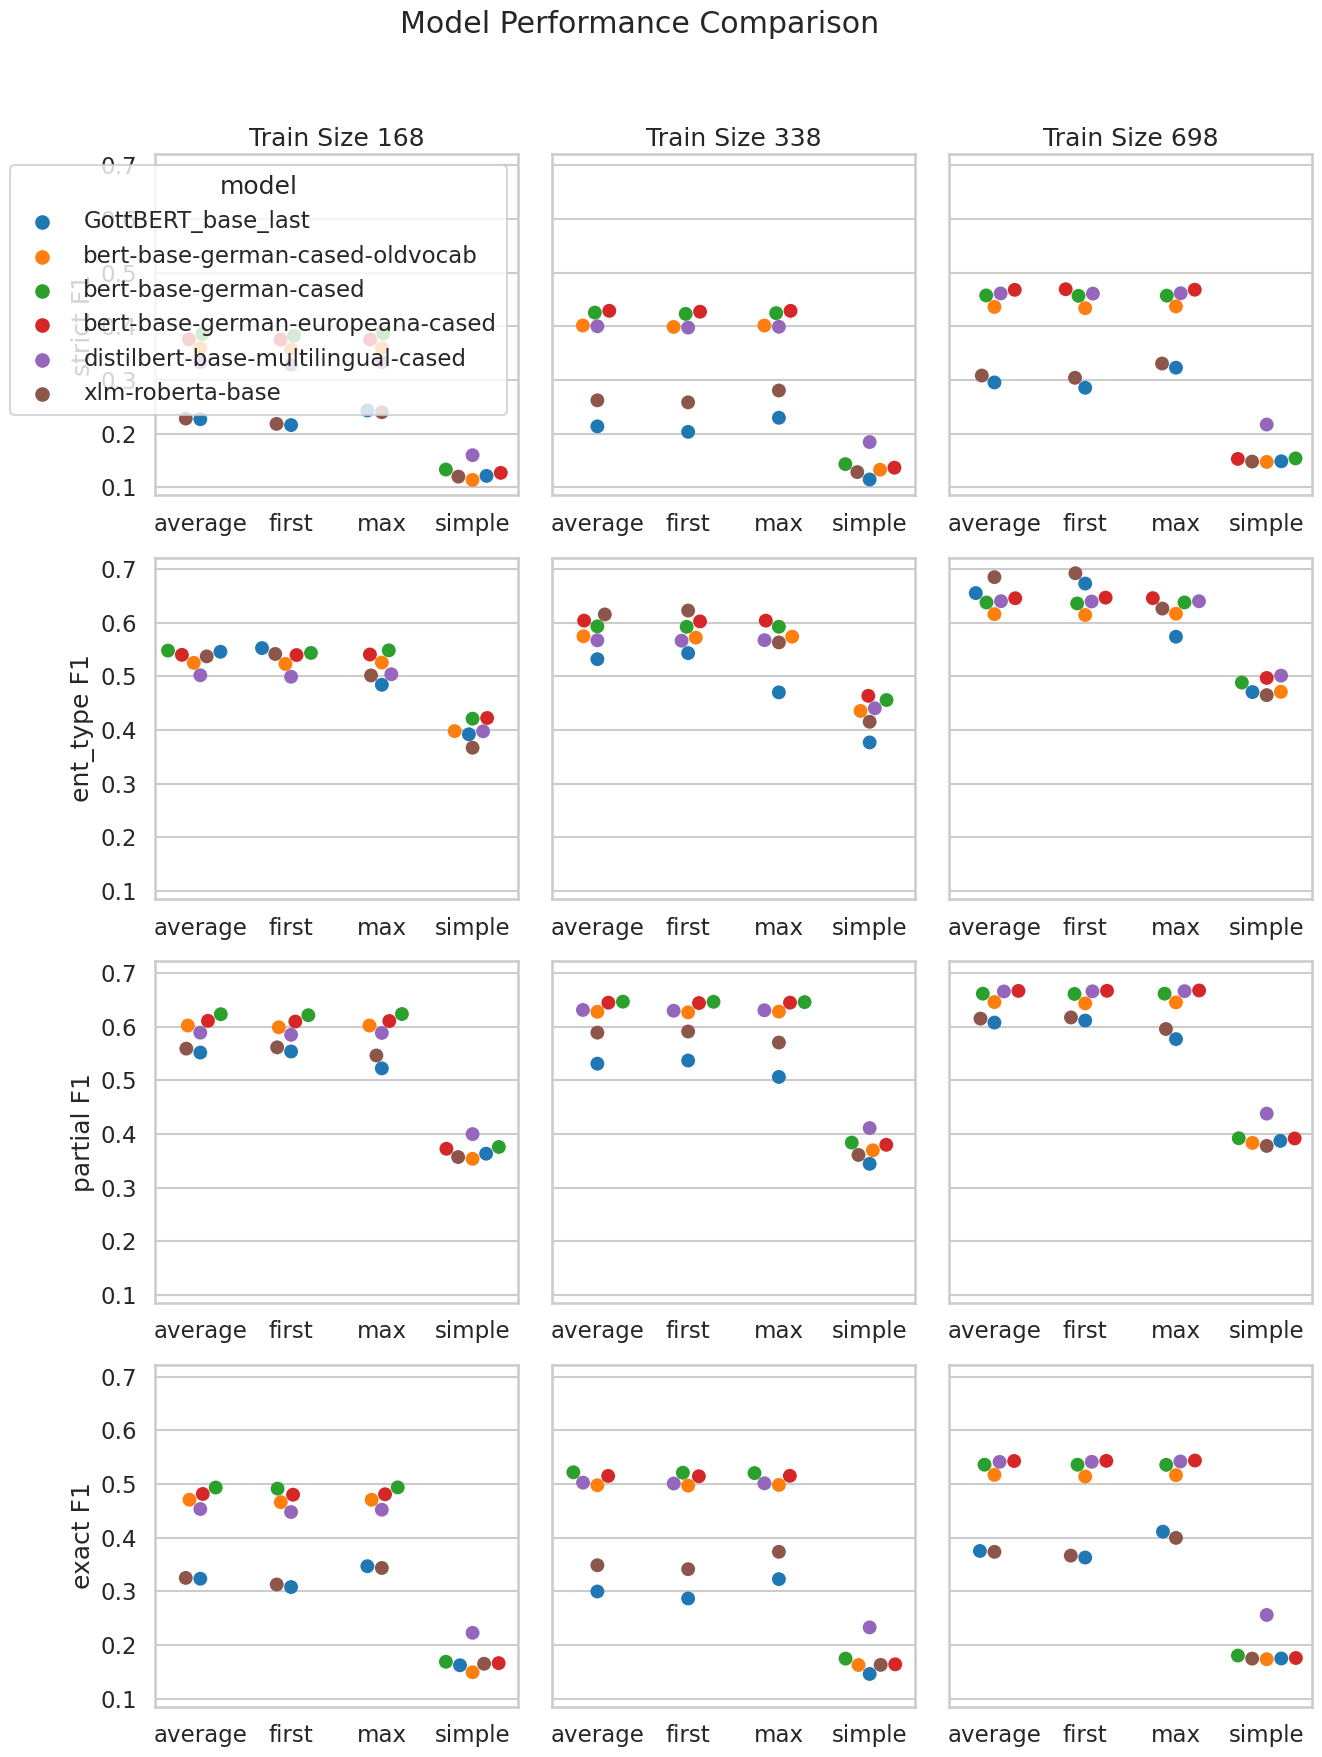

In [472]:
# 3. Create subplots grid
metrics = ['strict', 'ent_type', 'partial', 'exact']
train_sizes = sorted(melted['trainset_size'].unique())

# Create figure with subplots
fig, axes = plt.subplots(
    nrows=len(metrics),#3
    ncols=len(train_sizes),#4
    figsize=(14, 18),
    sharey=True
)

l="brief"

h_order = ['GottBERT_base_last',
           'bert-base-german-cased-oldvocab',
           'bert-base-german-cased',
           'bert-base-german-europeana-cased',
           'distilbert-base-multilingual-cased',
           'xlm-roberta-base']

# 4. Plot each combination
for row_idx, metric in enumerate(metrics):
    for col_idx, size in enumerate(train_sizes):
        ax = axes[row_idx, col_idx]
        subset = melted[(melted.trainset_size == size) & (melted.metric == metric)]
        
        sns.swarmplot(
            data=subset,
            x='agg',
            y='f1_score',
            hue='model',
            hue_order=h_order,
            ax=ax,
            legend=l,
            palette="tab10",
            size=10,
            #errorbar=None  # Remove confidence intervals
        )
        l=False
        # Add titles only for top row and first column
        if row_idx == 0:
            ax.set_title(f"Train Size {size}")
        if col_idx == 0:
            ax.set_ylabel(f"{metric} F1")
        else:
            ax.set_ylabel('')
            
        ax.set_xlabel('')
        
# Move legend outside
plt.legend(
    title="Model Name",
    #bbox_to_anchor=(1.05, 1),
    #loc="right",
    borderaxespad=0
)

# 5. Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Model Performance Comparison', y=0.98)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


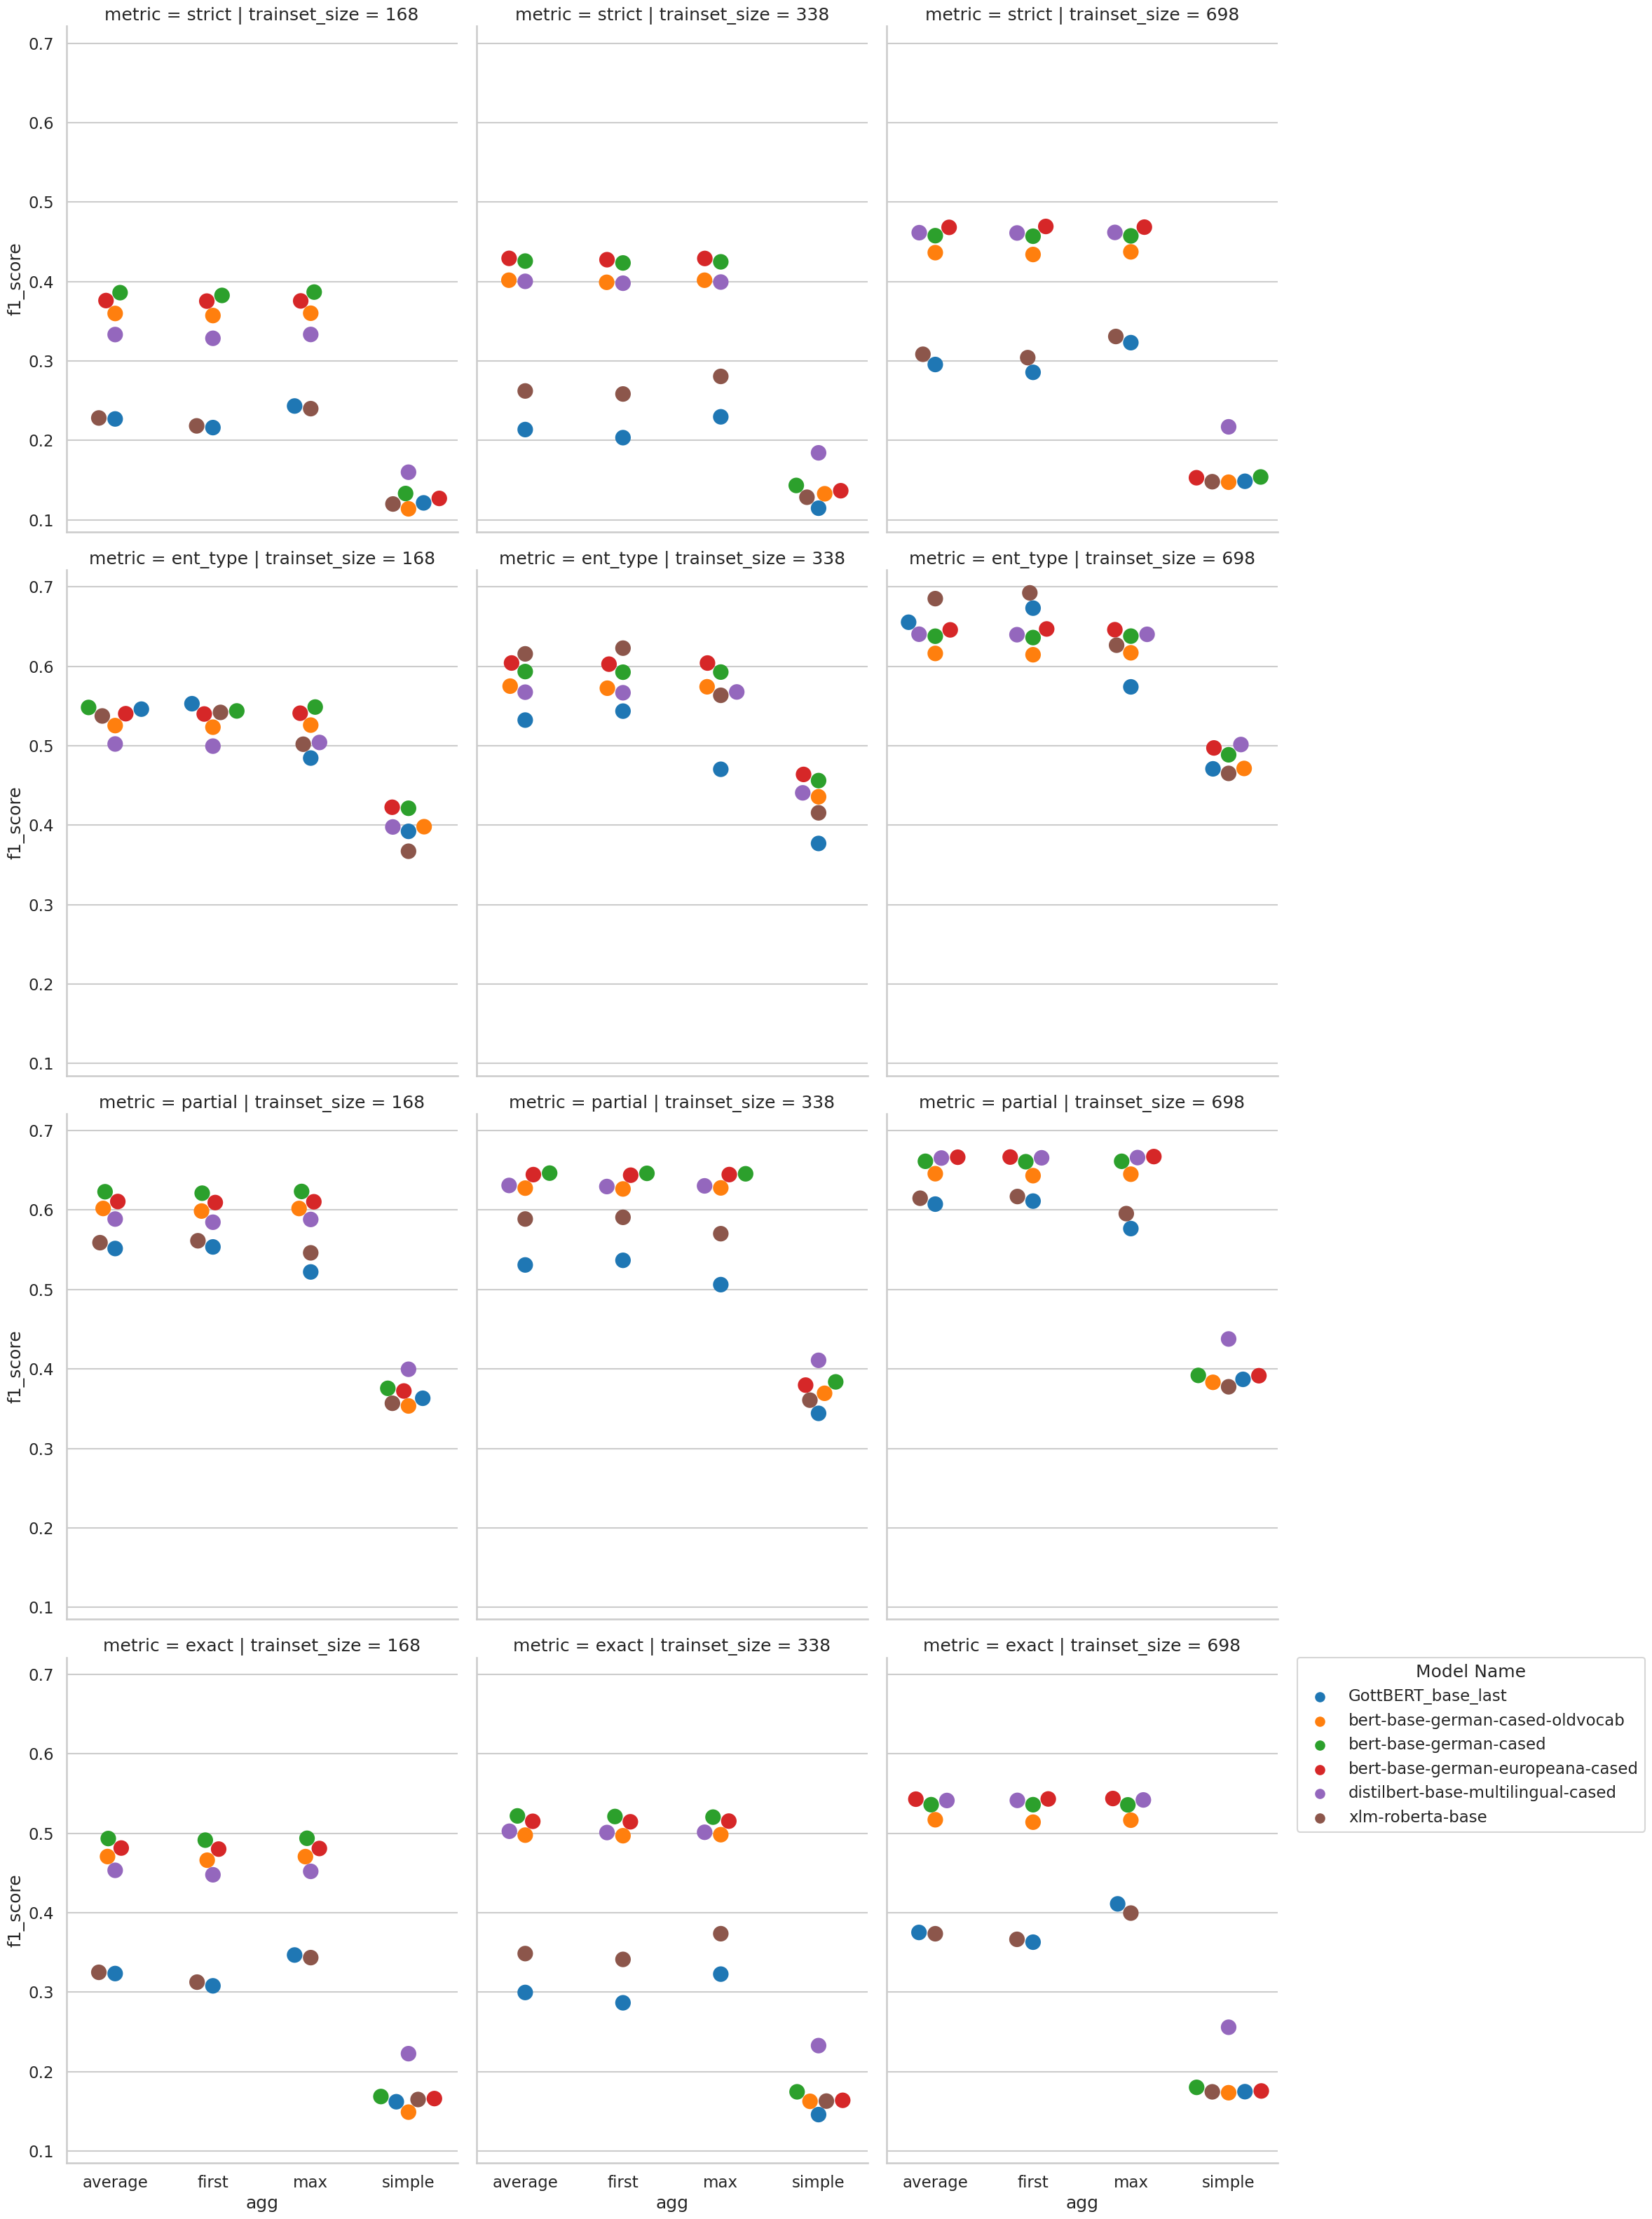

In [482]:
g = sns.FacetGrid(melted, col="trainset_size", row="metric", height=8)

g.map(sns.swarmplot,"agg","f1_score","model",hue_order=h_order,palette="tab10",size=16)
# Move legend outside
plt.legend(
    title="Model Name",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)
plt.tight_layout()
#plt.xticks([1, 2, 3, 4, 5])
g.savefig("model_comparison_different_agg+metric.pdf")